In [0]:

import time
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential

# We want to be able to repeat the experiment so we fix to a random seed
np.random.seed(70)

# Let us loading data 
data=pd.read_csv("ASX200Monthly.csv",usecols=['Close'])##usecols=['Date', 'Close'])
data = data.dropna()  # Drop all Nans

data = data.values  # Convert from DataFrame to Python Array  
                    # You need to make sure the data is type of float
                    # you may use data = data.astype('float32') if your data are integers
# Prepare data .....

In [0]:

""" Scaling ...
Neural networks normally work well with scaled data, especially when we use
the sigmoid or tanh activation function. It is a good practice to scale the
data to the range of 0-to-1. This can be easily done by using scikit-learn's 
MinMaxScaler 
"""
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

"""  Splitting ...
We are going to use a time window of k = 3, so we will split the time series as
   x_1, x_2, x_3,     x_4  [prediction]
   x_2, x_3, x_4,     x_5
   x_3, x_4, x_5,     x_6 
   ....
""" 
train_size = int(len(data)*0.7)   # Use the first 2/3 data for training
test_size = len(data) - train_size # the remaining for testing
Dtrain, Dtest = data[0:train_size,:], data[train_size:len(data),:]
# Both Xtrain and Xtest are in time series form, we need split them into sections
# in time-window size 4
time_window = 4
Xtrain, Ytrain = [], []
for i in range(len(Dtrain) - time_window -1):
    Xtrain.append(Dtrain[i:(i+time_window), 0])   # pick up the section in time_window size
    Ytrain.append(Dtrain[i+time_window, 0])       # pick up the next one as the prediction
Xtrain = np.array(Xtrain)    # Convert them from list to array   
Ytrain = np.array(Ytrain) 
 

Xtest, Ytest = [], []
for i in range(len(Dtest) - time_window -1):
    Xtest.append(Dtest[i:(i+time_window), 0])   # pick up the section in time_window size
    Ytest.append(Dtest[i+time_window, 0])       # pick up the next one as the prediction
Xtest = np.array(Xtest)    # Convert them from list to array   
Ytest = np.array(Ytest) 

# We are going to use keras package, so we must reshape our data to the keras required format
# (samples, time_window, features)  we are almost there, but need to reshape into 3D array
# For time series, the feature number is 1 (one scalar value at each time step)
Xtrain = np.reshape(Xtrain, (Xtrain.shape[0], time_window, 1))  
Xtest = np.reshape(Xtest, (Xtest.shape[0], time_window, 1))  






In [0]:

# Define our model .....
##model = Sequential()
MyBatchSize = 1

model = Sequential()
model.add(LSTM(units = 70, return_sequences = True, input_shape = (time_window,1)))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(LSTM(units = 70, return_sequences = True))
model.add(Activation('relu'))
model.add(Dropout(0.3))

model.add(LSTM(units = 70, return_sequences = True))
model.add(Dropout(0.3))
model.add(Activation('relu'))


model.add(LSTM(units = 70, return_sequences = False))
model.add(Dropout(0.3))
model.add(Activation('relu'))



##model.add(LSTM(units = 50))
##model.add(Dropout(0.2))
model.add(Dense(units = 1))
model.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

###regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)


# Training
model.fit(
	    Xtrain,
	    Ytrain,
	    batch_size=MyBatchSize,
	    nb_epoch=50,   # You increase this number
	    validation_split=0.05)

# Predicting
# make predictions
trainPredict = model.predict(Xtrain,batch_size=MyBatchSize)
testPredict = model.predict(Xtest,batch_size=MyBatchSize)
# invert predictions due to scaling
trainPredict = scaler.inverse_transform(trainPredict)
Ytrain = scaler.inverse_transform(Ytrain[:,np.newaxis])
testPredict = scaler.inverse_transform(testPredict)
Ytest = scaler.inverse_transform(Ytest[:,np.newaxis])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(Ytrain, trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(Ytest, testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))



Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


/Users/ratnesh/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 147 samples, validate on 8 samples
Epoch 1/50
147/147 [==============================] - 7s 50ms/step - loss: 0.0632 - acc: 0.0068 - val_loss: 0.0065 - val_acc: 0.0000e+00
Epoch 2/50
147/147 [==============================] - 5s 32ms/step - loss: 0.0180 - acc: 0.0136 - val_loss: 0.0067 - val_acc: 0.0000e+00
Epoch 3/50
147/147 [==============================] - 6s 41ms/step - loss: 0.0164 - acc: 0.0136 - val_loss: 0.0038 - val_acc: 0.0000e+00
Epoch 4/50
147/147 [==============================] - 7s 46ms/step - loss: 0.0172 - acc: 0.0136 - val_loss: 0.0033 - val_acc: 0.0000e+00
Epoch 5/50
147/147 [==============================] - 5s 35ms/step - loss: 0.0187 - acc: 0.0136 - val_loss: 0.0032 - val_acc: 0.0000e+00
Epoch 6/50
147/147 [==============================] - 4s 30ms/step - loss: 0.0151 - acc: 0.0136 - val_loss: 0.0042 - val_acc: 0.0000e+00
Epoch 7/50
147/147 [==============================] - 4s 31ms/step - loss: 0.0131 - acc: 0.0136 - val_loss: 0.0092 - val_acc: 0.0000e+

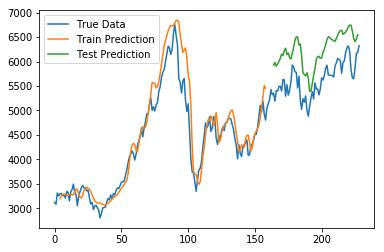

In [0]:
# Plotting results
# shift train predictions for plotting
trainPredictPlot = np.empty_like(data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_window:len(trainPredict)+time_window, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_window*2)+1:len(data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()





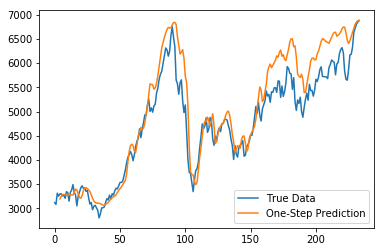

In [0]:
## Overall Predictions 
Xall = [] 
predictions = [] 

for i in range(6):
    Xall = []
    for j in range(len(data) - time_window):
        Xall.append(data[j:(j+time_window), 0])   # pick up the section in time_window size
    Xall = np.array(Xall)    # Convert them from list to array  
    Xall = np.reshape(Xall, (Xall.shape[0], time_window, 1)) 
    
    allPredict = model.predict(Xall,batch_size=MyBatchSize)
    data=np.append(data,allPredict[-1]) 
    data=data[:,np.newaxis]  
    allPredict = scaler.inverse_transform(allPredict)
    predictions.append(allPredict[-1])
    

data=data[:len(data)-1]

allPredictPlot = np.empty_like(data)
allPredictPlot[:, :] = np.nan
allPredictPlot[time_window:, :] = allPredict

plt.figure()
plt.plot(scaler.inverse_transform(data), label='True Data')
plt.plot(allPredictPlot, label='One-Step Prediction') 
plt.legend()
plt.show()

In [0]:
predictions